<div style="border: solid blue 2px; padding: 20px">

Hello Elizabeth,

Congratulations on successfully submitting your project! 🎉

Another project completed — fantastic work! Every step you take brings you closer to mastering the skills needed to excel in Data Science. Your dedication is evident, and you should be proud of your efforts.

Keep up the great momentum! As we review this project together, you’ll find **specific notes** inside the project file, highlighted in green or yellow for easy reference.

<div class="alert alert-success" style="border-left: 7px solid green">
<b>✅ Reviewer's Comment</b> 
    
Comments marked in green highlight efficient solutions and good ideas that can be applied in future projects. 
</div>

<div class="alert alert-warning" style="border-left: 7px solid gold">
<b>⚠️ Reviewer's Comment</b> 
    
Comments marked in yellow indicate areas where there is room for optimization. While corrections aren't mandatory, implementing these suggestions would be beneficial.
</div>

Congratulations once again on your journey and first hands-on experience. There are **no critical issues**, and your project has been **approved** — excellent job!

Keep up the amazing work! 🪄


# Zuber Cab History Analysis

In this project we will be analyzing some hystorical data from taxi rides in the Chicago area to get a better understanding of passenger preferences and external factors like weather can affect our rides and eventually our profits. 

Data description from previous part of the project:

1. neighborhoods table: data on city neighborhoods
- name: name of the neighborhood
- neighborhood_id: neighborhood code

2. cabs table: data on taxis
- cab_id: vehicle code
- vehicle_id: the vehicle's technical ID
- company_name: the company that owns the vehicle

3. trips table: data on rides
- trip_id: ride code
- cab_id: code of the vehicle operating the ride
- start_ts: date and time of the beginning of the ride (time rounded to the hour)
- end_ts: date and time of the end of the ride (time rounded to the hour)
- duration_seconds: ride duration in seconds
- distance_miles: ride distance in miles
- pickup_location_id: pickup neighborhood code
- dropoff_location_id: dropoff neighborhood code

4. weather_records table: data on weather
- record_id: weather record code
- ts: record date and time (time rounded to the hour)
- temperature: temperature when the record was taken
- description: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

Data Description for this Portion of the Project

1. project_sql_result_01.csv. It contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

2. project_sql_result_04.csv. It contains the following data:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

3. project_sql_result_07.csv — the result of the last query from our previous analysis prior to this part of the project. It contains data on rides from the Loop to O'Hare International Airport.
- start_ts — pickup date and time
- weather_conditions — weather conditions at the moment the ride started
- duration_seconds — ride duration in seconds

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Good start!
    
<strike>



In [1]:
# Import needed Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
# Import datasets
taxi_company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
taxi_dropoff_df = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
#review the datasets
taxi_company_df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



In [4]:
print(taxi_company_df.duplicated().sum())

0


In [5]:
taxi_company_df.sample(10)

,company_name,trips_amount
26,Gold Coast Taxi,428
58,5062 - 34841 Sam Mestas,8
15,Checker Taxi Affiliation,2216
11,Globe Taxi,4383
12,Dispatch Taxi Affiliation,3355
2,Medallion Leasing,10367
18,24 Seven Taxi,1775
56,5997 - 65283 AW Services Inc.,12
10,Choice Taxi Association,5015
63,3556 - 36214 RC Andrews Cab,2


In [6]:
taxi_dropoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
print(taxi_dropoff_df.duplicated().sum())

0


In [8]:
taxi_dropoff_df.sample(10)

,dropoff_location_name,average_trips
11,East Village,1212.066667
43,Mckinley Park,64.033333
59,Chatham,23.200000
35,Norwood Park,95.233333
48,Austin,44.433333
58,Englewood,25.433333
81,Morgan Park,7.700000
87,Pullman,3.896552
15,Garfield Ridge,745.400000
32,Douglas,142.900000


For these datasets we can see that there are no missing values, no duplicate rows, and that the data types make sense.

In [9]:
#identify the top 10 neighborhoods in terms of drop-offs

top_10_neighborhoods = taxi_dropoff_df.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


<function matplotlib.pyplot.show(close=None, block=None)>

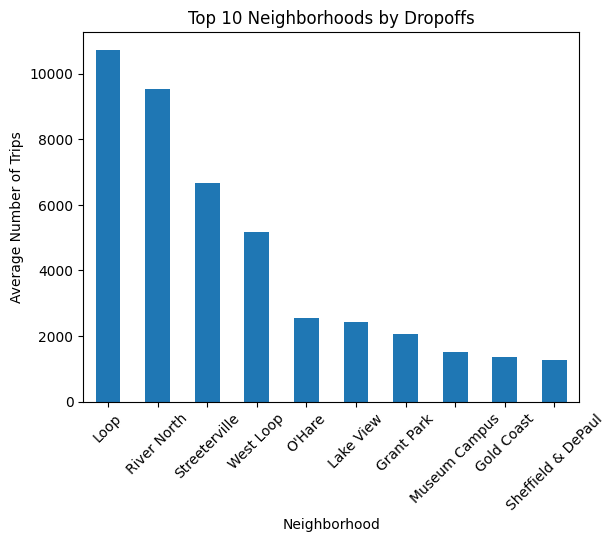

In [10]:
#make graphs: top 10 neighborhoods by number of dropoffs

top_10_neighborhoods.set_index('dropoff_location_name')['average_trips'].plot(kind='bar', stacked= False)
plt.title('Top 10 Neighborhoods by Dropoffs')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Trips')
plt.xticks(rotation=45)
plt.show

<div class="alert alert-warning"; style="border-left: 7px solid gold">  
<b>⚠️ Reviewer's comment, v. 1</b>  

Please add `()` after `plt.show` to ensure it executes correctly.  

</div>  


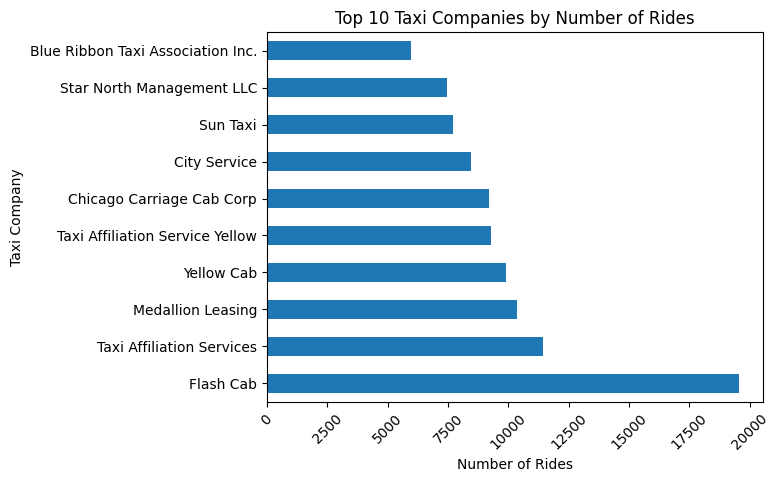

In [11]:
#make graphs: taxi companies and number of rides

top_companies = taxi_company_df.nlargest(10, 'trips_amount')  # Get top 10 companies by trip count
top_companies.set_index('company_name')['trips_amount'].plot(kind='barh', stacked=False)

plt.title('Top 10 Taxi Companies by Number of Rides')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.xticks(rotation=45)
plt.show()

To better visualize the top companies we also narrowed it down to the top 10 as having 64 different companies made it very challenging to see a good represenation of the data.

Based on these graphs we can see that the 2 most popular neighborhoods for dropoffs in Nov 2017 was Loop and River North and then a very steep drop of about 3,000 trips before the next most popular neighborhood. We can also see that Flash Cab is by far the most used taxi service by having over 7,000 more trips than the next most used company. 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Well done, you studied the data thoroughly.
    
You alse created an excellent chart with all the required elements, including a clear title, labeled axesand also drawn accurate conclusions from it.
    




# Step 5 Hypotheses Testing

In [12]:
#load dataset from the last query of Step 3
loop_ohare_df = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_ohare_df.info()
loop_ohare_df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
871,2017-11-11 05:00:00,Good,1860.0


In [13]:
#change data type of start_ts to datetime 
loop_ohare_df['start_ts'] = pd.to_datetime(loop_ohare_df['start_ts'])
loop_ohare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

To do this we will first have to separate the weather conditions into rainy and not rainy groups.

In [14]:
# Separate rides into rainy and non-rainy Saturdays
rainy_saturdays = loop_ohare_df[loop_ohare_df['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = loop_ohare_df[loop_ohare_df['weather_conditions'] == 'Good']['duration_seconds']

In this scenario our null hypothesis is that there is no difference between the average duration of rides on rainy Saturdays and Saturdays when it isn't raining. The Alternative hypothesis is that there is a difference between the average ride duration on rainy Saturdays.

To test this we will run the test on the equality of 2 population means with a significance value of 0.05.  To ensure equal variance we will run the Levene's test first.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You formulated the hypothesis correctly.

In [15]:
# Check variance equality (Levene’s test)
levene_test = st.levene(rainy_saturdays, non_rainy_saturdays)
print(f'Levene’s test for equal variances: p-value = {levene_test.pvalue}')

Levene’s test for equal variances: p-value = 0.5332038671974493


Because the p-value for Levene's test is >0.05 we can assume equal variance

In [16]:
# Test the hypotheses
alpha = 0.05

results = st.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var= False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.738994326108734e-12
We reject the null hypothesis


Since the p-value is SO small, we can very confidently reject the null hypothesis that there is no difference between the average duration of rides on rainy vs not rainy Saturdays.  Therefore, we can say that the rain can be a factor in drive times and one should plan accordingly to make sure they do not miss their flight. 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You used correct type of the test and made accurate conclusions.